In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme()
energy_table = pd.read_csv('../BDD/Netherlands/energy-netherlands.csv', sep=';')
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='NLD']
gdp_table.drop('Entity', axis=1, inplace=True)
gdp_table.drop('Code', axis=1, inplace=True)
gdp_table.drop('145446-annotations', axis=1, inplace=True)
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='NLD']
ND_table = pd.merge(gdp_table, pop_table, on=['Year'])
ND_table = pd.merge(ND_table, energy_table, on=['Year'])
ND_table

,Year,GDP per capita,Entity,Code,"Total population (Gapminder, HYDE & UN)",Energy (PetaJoules),Energy (TWh)
0,1800,4184.49,Netherlands,NLD,2254522,55.070000,19.636482
1,1801,4110.52,Netherlands,NLD,2258382,55.070000,19.636482
2,1802,4337.79,Netherlands,NLD,2262250,55.070000,19.636482
3,1803,4244.21,Netherlands,NLD,2266123,55.070000,19.636482
4,1804,4445.63,Netherlands,NLD,2270004,55.070000,19.636482
...,...,...,...,...,...,...,...
206,2012,43957.00,Netherlands,NLD,16792000,2635.786185,1053.201000
207,2013,43744.00,Netherlands,NLD,16844000,2641.120509,1021.773000
208,2014,44205.00,Netherlands,NLD,16893000,2665.270446,965.058000
209,2015,44869.00,Netherlands,NLD,16938000,2730.494673,976.851000


In [4]:
pop = ND_table['Total population (Gapminder, HYDE & UN)']
gdp = ND_table['GDP per capita']*pop
energy = ND_table['Energy (PetaJoules)']
year = ND_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)

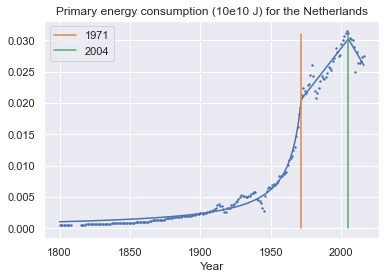

In [6]:
plt.scatter(year, energy/10**5, s=2) 
plt.xlabel('Year')
plt.title('Primary energy consumption (10e10 J) for the Netherlands')
b,c,d,f,x1,x2 = 0.15, 1979, 0.0003, -0.0005, 1972, 2004
b,c,d,f,x1,x2 = reg.hypLinLin(year, energy/10**5, p0=(b,c,d,f,x1,x2), bounds= [-1, 2100])
plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 0.031], label = str(int(x1)))
plt.plot([x2, x2], [0, 0.031], label = str(int(x2)))
plt.legend()
ypred=(10**5)* reg.hyp_lin_lin(year,b,c,d,f,x1,x2 )
ND_table['Energy(PJ)-Time(Year)'] = ypred

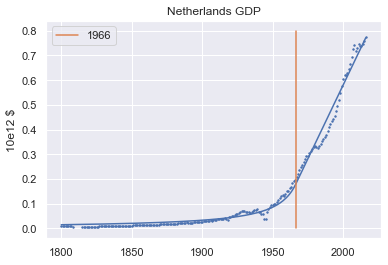

In [7]:
plt.scatter(year, gdp/10**12, s=2)
plt.title('Netherlands GDP')
b,c,d,f,x1,x2 = 12, 1983,0.033,0.025,1971,2009
# plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
b,c,d,f,x1,x2 = reg.hypLinLin (year, gdp/10**12, p0=(b,c,d,f,x1,x2), bounds = [-2, 2100])
plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 0.8], label=str(int(x1)))
plt.legend()
plt.ylabel('10e12 $')
ypred= reg.hyp_lin_lin(year,b,c,d,f,x1,x2 )*(10**12)
ND_table['GDP(2011$)-Time(year)'] =ypred

(0.0318089481, 0.0025811099999999997, 9.999725341796875, 0.017945464095533898, 0.02409297961225087, -0.010702072409874006)


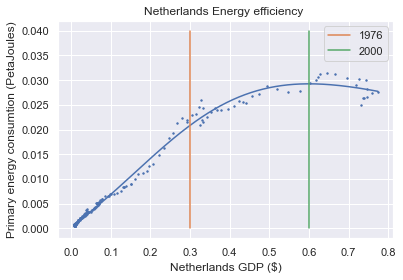

In [9]:
g= gdp/10**12
e = energy/10**5
gplot = np.linspace(g.min(), g.max(), 200)
plt.scatter(g,e, s= 2)
plt.xlabel('Netherlands GDP ($)')
plt.ylabel('Primary energy consumtion (PetaJoules)')
plt.title('Netherlands Energy efficiency ')
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e, bounds= [-1000, 10**14])
plt.plot(gplot, reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ))
inf_dist = np.array([abs(g[i]-0.3) for i in range(len(g))])
year_infl = year[inf_dist.argmin()]
plt.plot([0.3, 0.3],[0.0, 0.04], label = str(year_infl))

e_max = reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ).argmax()
max_dist = np.array([abs(g[i]-gplot[e_max]) for i in range(len(g))])
year_max = year[max_dist.argmin()]
plt.plot([gplot[e_max], gplot[e_max]], [0.0, 0.04], label = str(year_max)) 
plt.legend()
ypred= reg.s_model(g,G_i, E_i, A, a1, a2, a3 )*(10**5)
ND_table['Energy(PJ)-GDP(10e12$)'] = ypred

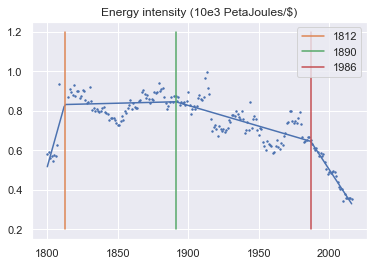

In [10]:
plt.scatter(year, energy/gdp*10**8, s=2)
a,b, c, e, g, x1, x2, x3 = -10, 10, 10, -2*10, -1.5*10, 1850, 1925, 1980
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, energy/gdp*10**8, p0=(a,b, c, e, g, x1, x2, x3) , bounds = [-200,2010])
plt.plot(yplot, reg.llll(yplot,a,b, c, e, g, x1, x2, x3 ))
plt.plot([x1, x1], [0.2, 1.2], label=str(int(x1)))
plt.plot([x2, x2], [0.2, 1.2], label=str(int(x2)))
plt.plot([x3, x3], [0.2, 1.2], label=str(int(x3)))
plt.legend()
plt.title('Energy intensity (10e3 PetaJoules/$)')
ypred = reg.llll(year,a,b, c, e, g, x1, x2, x3 )*(10**8)
ND_table['EI(PJ/$)-Time(year)'] = ypred

Text(0.5, 1.0, 'Variation in (%), Netherlands')

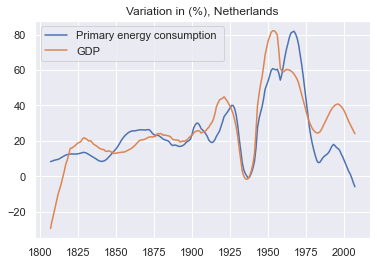

In [9]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), Netherlands")


In [12]:
ND_table =ND_table.rename(columns={'Energy (PetaJoules)':'Primary energy (PJ)', 'Energy (TWh)':'Primary energy (TWh)','Total population (Gapminder, HYDE & UN)' : 'Population' })

In [14]:
ND_table.to_csv('../BDD/NLD.csv', index=False)